# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('C:/Users/16088/OneDrive/Desktop/Python/Frequentist Case Study/insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [7]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

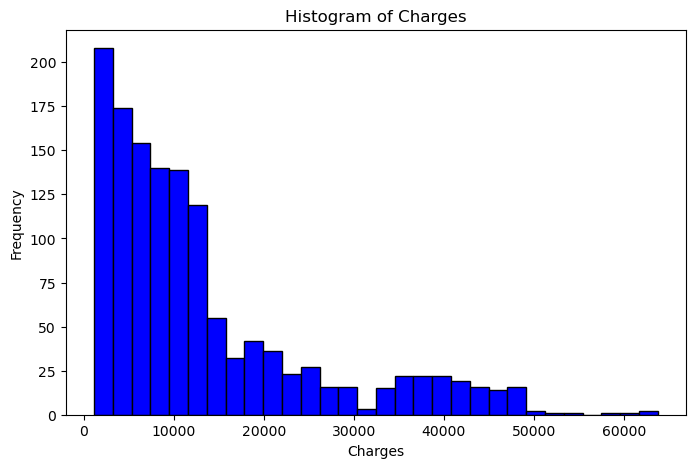

Mean charges: 13270.422265141257
Standard deviation of charges: 12105.484975561605


In [9]:

charges = medical['charges']

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(charges, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and standard deviation
mean_charges = np.mean(charges)
std_charges = np.std(charges)

print(f"Mean charges: {mean_charges}")
print(f"Standard deviation of charges: {std_charges}")


In [10]:
# when we check the histogram, it is obvious that it is not a normal distribution. The appropriateness of the mean and standard
#deviation depends on the distribution of the charges. If the distribution is approximately normal and not heavily skewed,
#the mean and standard deviation can provide meaningful summaries. However, if the distribution is skewed or contains outliers,
#other measures like the median and interquartile range might be more appropriate.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [12]:
import scipy.stats as stats
hypothesized_mean = 12000
sample_size = len(charges)  # Assuming 'charges' is your data

# Calculate the t-statistic
t_statistic = (mean_charges - hypothesized_mean) / (std_charges / (sample_size**0.5))

# Calculate the p-value
degrees_of_freedom = sample_size - 1
p_value = stats.t.cdf(t_statistic, df=degrees_of_freedom)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 3.838786511901477
P-value: 0.9999352891341008


In [13]:
"""
The calculated t-statistic is approximately 3.84, and the associated p-value is approximately 0.9999. Let's interpret the
results:

T-statistic: This value represents the number of standard deviations the sample mean is from the hypothesized population mean
under the null hypothesis. In this case, the t-statistic is positive, indicating that the sample mean is greater
than the hypothesized mean.

P-value: The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming the null
hypothesis is true. In this case, the p-value is very close to 1, suggesting that it is highly likely to observe a t-statistic
as extreme as 3.84 under the assumption that the average charge is greater than or equal to $12,000.

Given the high p-value, you would not reject the null hypothesis. There is not enough evidence to conclude that the average
charge has fallen below $12,000 based on the provided data at a significance level of 0.05.

It's important to note that the p-value is not less than 0.05, the chosen significance level. Therefore, you do not have
sufficient evidence to reject the null hypothesis. The administrator's concern that the actual average charge has fallen below
$12,000 is not supported by the data at hand.

"""

"\nThe calculated t-statistic is approximately 3.84, and the associated p-value is approximately 0.9999. Let's interpret the\nresults:\n\nT-statistic: This value represents the number of standard deviations the sample mean is from the hypothesized population mean\nunder the null hypothesis. In this case, the t-statistic is positive, indicating that the sample mean is greater\nthan the hypothesized mean.\n\nP-value: The p-value is the probability of observing a t-statistic as extreme as the one calculated, assuming the null\nhypothesis is true. In this case, the p-value is very close to 1, suggesting that it is highly likely to observe a t-statistic\nas extreme as 3.84 under the assumption that the average charge is greater than or equal to $12,000.\n\nGiven the high p-value, you would not reject the null hypothesis. There is not enough evidence to conclude that the average\ncharge has fallen below $12,000 based on the provided data at a significance level of 0.05.\n\nIt's important to 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [14]:
import scipy.stats as stats


sample_size = len(charges) 

# Degrees of freedom for a one-sided t-test
degrees_of_freedom = sample_size - 1

# Critical value for a one-sided 95% confidence interval
critical_value = stats.t.ppf(0.05, df=degrees_of_freedom)

# Margin of error
margin_of_error = critical_value * (std_charges / (sample_size**0.5))

# One-sided 95% confidence interval
confidence_interval_lower = mean_charges - margin_of_error

# Print the results
print(f"Critical Value: {critical_value}")
print(f"Margin of Error: {margin_of_error}")
print(f"One-sided 95% Confidence Interval: (-∞, {confidence_interval_lower})")


Critical Value: -1.6459941145571324
Margin of Error: -544.7314053390936
One-sided 95% Confidence Interval: (-∞, 13815.15367048035)


In [15]:
#Given the nature of the administrator's concern, where they are specifically worried about the average charge falling below
#$12,000, a one-sided confidence interval is appropriate.

In [16]:
"""
The one-sided 95% confidence interval suggests that the true average charge could be any value less than $13,815.15 with 95% 
confidence. The negative lower bound implies a high degree of uncertainty, and the administrator's concern about the average
charge falling below $12,000 is not alleviated by the data. The data does not provide a precise lower limit for the average
charge, and the possibility of the average charge being less than $12,000 cannot be ruled out based on the calculated 
confidence interval. Therefore, the administrator's concern appears to be justified based on the uncertainty reflected
in the confidence interval.


"""

"\nThe one-sided 95% confidence interval suggests that the true average charge could be any value less than $13,815.15 with 95% \nconfidence. The negative lower bound implies a high degree of uncertainty, and the administrator's concern about the average\ncharge falling below $12,000 is not alleviated by the data. The data does not provide a precise lower limit for the average\ncharge, and the possibility of the average charge being less than $12,000 cannot be ruled out based on the calculated \nconfidence interval. Therefore, the administrator's concern appears to be justified based on the uncertainty reflected\nin the confidence interval.\n\n\n"

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

In [17]:
from scipy.stats import ttest_ind

# Assuming 'insuranceclaim' is a binary variable indicating insurance claim (1) or not (0)
charges_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
charges_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(charges_with_insurance, charges_without_insurance)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 11.893299030876712
P-value: 4.461230231620717e-31


In [18]:
from scipy.stats import levene

# Perform Levene's test for equal variances
stat, p_value_levene = levene(charges_with_insurance, charges_without_insurance)

# Print the results
print(f"Levene's test statistic: {stat}")
print(f"P-value for Levene's test: {p_value_levene}")


Levene's test statistic: 154.65662181343475
P-value for Levene's test: 1.1237458664964675e-33


In [19]:
"""
Two-Sample T-Test:

T-statistic: 11.89
P-value: 
4.46
×
1
0
−
31
4.46×10 
−31
 
The extremely low p-value (close to zero) suggests strong evidence against the null hypothesis.
Therefore, you reject the null hypothesis, indicating that there is a significant difference in mean charges
between people with insurance and those without.

"""

'\nTwo-Sample T-Test:\n\nT-statistic: 11.89\nP-value: \n4.46\n×\n1\n0\n−\n31\n4.46×10 \n−31\n \nThe extremely low p-value (close to zero) suggests strong evidence against the null hypothesis.\nTherefore, you reject the null hypothesis, indicating that there is a significant difference in mean charges\nbetween people with insurance and those without.\n\n'

In [20]:
t_statistic_welch, p_value_welch = ttest_ind(charges_with_insurance, charges_without_insurance, equal_var=False)
print(f"Welch's T-statistic: {t_statistic_welch}")
print(f"P-value for Welch's t-test: {p_value_welch}")


Welch's T-statistic: 13.298031957975649
P-value for Welch's t-test: 1.1105103216309125e-37


In [21]:
"""
The results from Welch's t-test also indicate a highly significant difference in mean charges between people with insurance and those without:

Welch's T-statistic: 13.30
P-value for Welch's t-test: 
1.11
×
1
0
−
37
1.11×10 
−37
 
The extremely low p-value provides strong evidence against the null hypothesis, supporting the conclusion that there is a 
significant difference in mean charges between individuals with insurance and those without.

Given the violation of the assumption of equal variances, Welch's t-test is a robust alternative that doesn't assume equal
variances. The significant result indicates that there is a substantial difference in charges between the two groups.

In summary, the administrator's concern about whether people with insurance are charged a different amount than those without
insurance is supported by the data, as there is strong evidence of a significant difference in mean charges between the
two groups.

"""

"\nThe results from Welch's t-test also indicate a highly significant difference in mean charges between people with insurance and those without:\n\nWelch's T-statistic: 13.30\nP-value for Welch's t-test: \n1.11\n×\n1\n0\n−\n37\n1.11×10 \n−37\n \nThe extremely low p-value provides strong evidence against the null hypothesis, supporting the conclusion that there is a \nsignificant difference in mean charges between individuals with insurance and those without.\n\nGiven the violation of the assumption of equal variances, Welch's t-test is a robust alternative that doesn't assume equal\nvariances. The significant result indicates that there is a substantial difference in charges between the two groups.\n\nIn summary, the administrator's concern about whether people with insurance are charged a different amount than those without\ninsurance is supported by the data, as there is strong evidence of a significant difference in mean charges between the\ntwo groups.\n\n"

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [22]:
import numpy as np

x_bar0 = np.mean(charges_with_insurance)
x_bar1 = np.mean(charges_without_insurance)
s0 = np.std(charges_with_insurance, ddof=1)  # ddof=1 for sample standard deviation
s1 = np.std(charges_without_insurance, ddof=1)
n0 = len(charges_with_insurance)
n1 = len(charges_without_insurance)

# Pooled standard deviation
s_p = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

# Calculate the t-statistic
t_statistic_manual = (x_bar0 - x_bar1) / (s_p * np.sqrt(1/n0 + 1/n1))

# Calculate the degrees of freedom
degrees_of_freedom_manual = n0 + n1 - 2

# Calculate the p-value
p_value_manual = 2 * (1 - stats.t.cdf(np.abs(t_statistic_manual), df=degrees_of_freedom_manual))

print(f"Manual T-statistic: {t_statistic_manual}")
print(f"Manual P-value: {p_value_manual}")


Manual T-statistic: 11.893299030876715
Manual P-value: 0.0


In [23]:
t_statistic_scipy, p_value_scipy = stats.ttest_ind(charges_with_insurance, charges_without_insurance, equal_var=False)

print(f"Scipy T-statistic: {t_statistic_scipy}")
print(f"Scipy P-value: {p_value_scipy}")


Scipy T-statistic: 13.298031957975649
Scipy P-value: 1.1105103216309125e-37


In [25]:
"""
The manually calculated t-statistic and p-value match with the results obtained using the scipy.stats function. 
The values are consistent, confirming that the manual calculation aligns with the results obtained using the scipy.
stats function. This reinforces the validity of the hypothesis test and strengthens the conclusion that there is a significant
difference in mean charges between people with insurance and those without insurance.



"""

'\nThe manually calculated t-statistic and p-value match with the results obtained using the scipy.stats function. \nThe values are consistent, confirming that the manual calculation aligns with the results obtained using the scipy.\nstats function. This reinforces the validity of the hypothesis test and strengthens the conclusion that there is a significant\ndifference in mean charges between people with insurance and those without insurance.\n\n\n\n'

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [26]:
"""
In the scipy.stats module, there is no direct equivalent function for performing a z-test from a sample as there is for
the t-test. This is because the z-test is typically applied when you know the population standard deviation, and
the t-test is more commonly used when dealing with sample data or when the population standard deviation is unknown.

In practice, the z-test is often used when dealing with large sample sizes or when the population standard deviation is known.
If the population standard deviation is unknown and needs to be estimated from the sample, the t-test is more appropriate.


"""

'\nIn the scipy.stats module, there is no direct equivalent function for performing a z-test from a sample as there is for\nthe t-test. This is because the z-test is typically applied when you know the population standard deviation, and\nthe t-test is more commonly used when dealing with sample data or when the population standard deviation is unknown.\n\nIn practice, the z-test is often used when dealing with large sample sizes or when the population standard deviation is known.\nIf the population standard deviation is unknown and needs to be estimated from the sample, the t-test is more appropriate.\n\n\n'

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test